## Import libraries

In [1]:
import pandas as pd
#import matplotlib.pyplot as plt

## Set url and fetch data with a column called Position
Returns a list of tables - the one we want is index 0

But the 2020-21Position colum is not parsed correctly - it begins with a number but als o containd letters e.g. 1st

lxml is causing this problen so change parser to bs4

In [2]:
url="https://en.wikipedia.org/wiki/Premier_League"

In [3]:
infotable = pd.read_html(url,match="Position")
infotable

[                   2021–22Club 2020–21Position First season intop division  \
 0                Arsenal[a][b]             NaN                     1904–05   
 1            Aston Villa[a][c]             NaN                     1888–89   
 2                 Brentford[b]             CS)                     1935–36   
 3    Brighton & Hove Albion[b]             NaN                     1979–80   
 4                   Burnley[c]             NaN                     1888–89   
 5                Chelsea[a][b]             NaN                     1907–08   
 6            Crystal Palace[a]             NaN                     1969–70   
 7             Everton[a][b][c]             NaN                     1888–89   
 8              Leeds United[a]             NaN                     1924–25   
 9               Leicester City             NaN                     1908–09   
 10             Liverpool[a][b]             NaN                     1894–95   
 11          Manchester City[a]             NaN     

In [4]:
infotable[0].head()

,2021–22Club,2020–21Position,First season intop division,First season inPremier League,Seasonsin topdivision,Seasonsin PremierLeague,First season ofcurrent spell intop division,No. of seasonsof current spellin Premier League,Topdivisiontitles,Mostrecent topdivision title
0,Arsenal[a][b],NaN,1904–05,1992–93,105,30,1919–20,30,13,2003–04
1,Aston Villa[a][c],NaN,1888–89,1992–93,108,27,2019–20,3,7,1980–81
2,Brentford[b],CS),1935–36,2021–22,6,1,2021–22,1,0,–
3,Brighton & Hove Albion[b],NaN,1979–80,2017–18,9,5,2017–18,5,0,–
4,Burnley[c],NaN,1888–89,2009–10,59,8,2016–17,6,2,1959–60


# Fetch data but using bs4

In [5]:
infotable = pd.read_html(url,match="Position",flavor='bs4')

In [6]:
infotable=infotable[0]
infotable

,2021–22Club,2020–21Position,First season intop division,First season inPremier League,Seasonsin topdivision,Seasonsin PremierLeague,First season ofcurrent spell intop division,No. of seasonsof current spellin Premier League,Topdivisiontitles,Mostrecent topdivision title
0,Arsenal[a][b],8th,1904–05,1992–93,105,30,1919–20,30,13,2003–04
1,Aston Villa[a][c],11th,1888–89,1992–93,108,27,2019–20,3,7,1980–81
2,Brentford[b],3rd (CS),1935–36,2021–22,6,1,2021–22,1,0,–
3,Brighton & Hove Albion[b],16th,1979–80,2017–18,9,5,2017–18,5,0,–
4,Burnley[c],17th,1888–89,2009–10,59,8,2016–17,6,2,1959–60
5,Chelsea[a][b],4th,1907–08,1992–93,87,30,1989–90,30,6,2016–17
6,Crystal Palace[a],14th,1969–70,1992–93,22,13,2013–14,9,0,–
7,Everton[a][b][c],10th,1888–89,1992–93,119,30,1954–55,30,9,1986–87
8,Leeds United[a],9th,1924–25,1992–93,52,14,2020–21,2,3,1991–92
9,Leicester City,5th,1908–09,1994–95,53,16,2014–15,8,1,2015–16


In [7]:
infotable2 = pd.DataFrame()
infotable2['Club']  = infotable['2021–22Club']
infotable2['No-of-Seasons']  = infotable['Seasonsin topdivision']
infotable2['Titles']  = infotable['Topdivisiontitles']
infotable2


,Club,No-of-Seasons,Titles
0,Arsenal[a][b],105,13
1,Aston Villa[a][c],108,7
2,Brentford[b],6,0
3,Brighton & Hove Albion[b],9,0
4,Burnley[c],59,2
5,Chelsea[a][b],87,6
6,Crystal Palace[a],22,0
7,Everton[a][b][c],119,9
8,Leeds United[a],52,3
9,Leicester City,53,1


# Assume we don't need the notes in the Club column except for the relegated item [b]
we'll convert the relegated data into a column and delete the other two

In [8]:
infotable2['Never relegated'] = infotable2['Club'].str.contains('[b]')
infotable2

,Club,No-of-Seasons,Titles,Never relegated
0,Arsenal[a][b],105,13,True
1,Aston Villa[a][c],108,7,False
2,Brentford[b],6,0,True
3,Brighton & Hove Albion[b],9,0,True
4,Burnley[c],59,2,False
5,Chelsea[a][b],87,6,True
6,Crystal Palace[a],22,0,False
7,Everton[a][b][c],119,9,True
8,Leeds United[a],52,3,False
9,Leicester City,53,1,False


In [9]:
infotable2['Club'] = infotable2['Club'].replace('\[.\]','',regex=True)


# Sort by Seasons in top division

In [10]:
infotable2.sort_values('No-of-Seasons', ascending=False).head(10)

,Club,No-of-Seasons,Titles,Never relegated
7,Everton,119,9,True
1,Aston Villa,108,7,False
10,Liverpool,107,19,True
0,Arsenal,105,13,True
12,Manchester United,97,20,True
11,Manchester City,93,7,False
13,Newcastle United,90,4,False
5,Chelsea,87,6,True
16,Tottenham Hotspur,87,2,True
19,Wolverhampton Wanderers,67,3,False


Everton is the team that has been in the top league for the longest

In [11]:
infotable2[infotable2['Never relegated']==True].sort_values('No-of-Seasons', ascending=False)



,Club,No-of-Seasons,Titles,Never relegated
7,Everton,119,9,True
10,Liverpool,107,19,True
0,Arsenal,105,13,True
12,Manchester United,97,20,True
5,Chelsea,87,6,True
16,Tottenham Hotspur,87,2,True
3,Brighton & Hove Albion,9,0,True
2,Brentford,6,0,True


In [12]:
candidates=infotable2[infotable2['Never relegated']==True].sort_values('No-of-Seasons', ascending=False)[:6]
candidates=candidates.drop(columns=['Never relegated'])
candidates['No-of-Seasons']=candidates['No-of-Seasons'].astype('int64')
candidates['Titles']=candidates['Titles'].astype('int64')
candidates

,Club,No-of-Seasons,Titles
7,Everton,119,9
10,Liverpool,107,19
0,Arsenal,105,13
12,Manchester United,97,20
5,Chelsea,87,6
16,Tottenham Hotspur,87,2


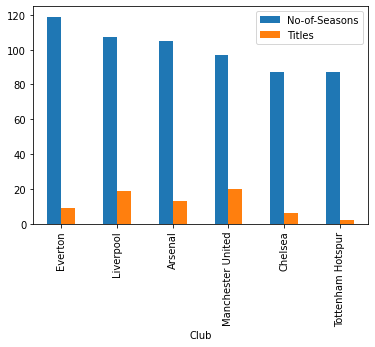

In [13]:

candidates.plot.bar(x='Club')

In [14]:
candidates=candidates.sort_values('Titles', ascending=False)[:3]
candidates

,Club,No-of-Seasons,Titles
12,Manchester United,97,20
10,Liverpool,107,19
0,Arsenal,105,13


# Another table

The final league table for 2020-21

Not much editing required here

In [15]:
# 2020-21 season
url="https://en.wikipedia.org/wiki/2020%E2%80%9321_Premier_League"
leaguetable = pd.read_html(url,match="Pos")
leaguetable=leaguetable[1]


# plot
goal for 
goals against
win/draw/lose

In [16]:
leaguetable

,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification or relegation
0,1,Manchester City (C),38,27,5,6,83,32,+51,86,Qualification for the Champions League group s...
1,2,Manchester United,38,21,11,6,73,44,+29,74,Qualification for the Champions League group s...
2,3,Liverpool,38,20,9,9,68,42,+26,69,Qualification for the Champions League group s...
3,4,Chelsea,38,19,10,9,58,36,+22,67,Qualification for the Champions League group s...
4,5,Leicester City,38,20,6,12,68,50,+18,66,Qualification for the Europa League group stag...
5,6,West Ham United,38,19,8,11,62,47,+15,65,Qualification for the Europa League group stag...
6,7,Tottenham Hotspur,38,18,8,12,68,45,+23,62,Qualification for the Europa Conference League...
7,8,Arsenal,38,18,7,13,55,39,+16,61,NaN
8,9,Leeds United,38,18,5,15,62,54,+8,59,NaN
9,10,Everton,38,17,8,13,47,48,−1,59,NaN


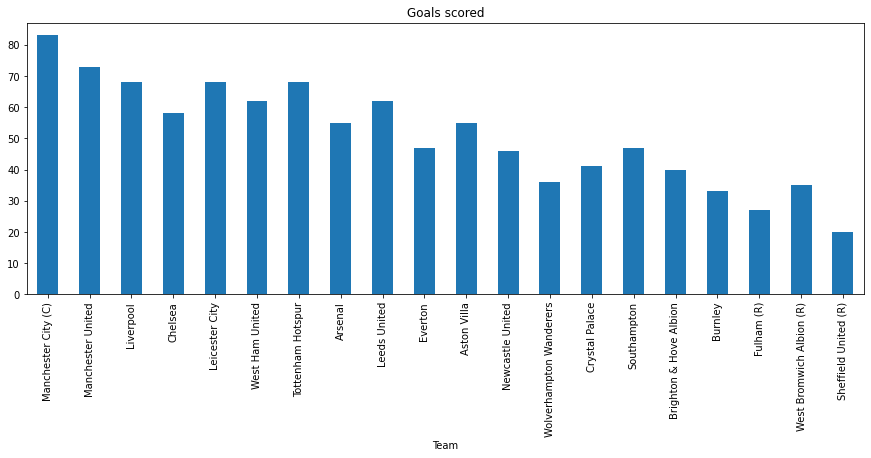

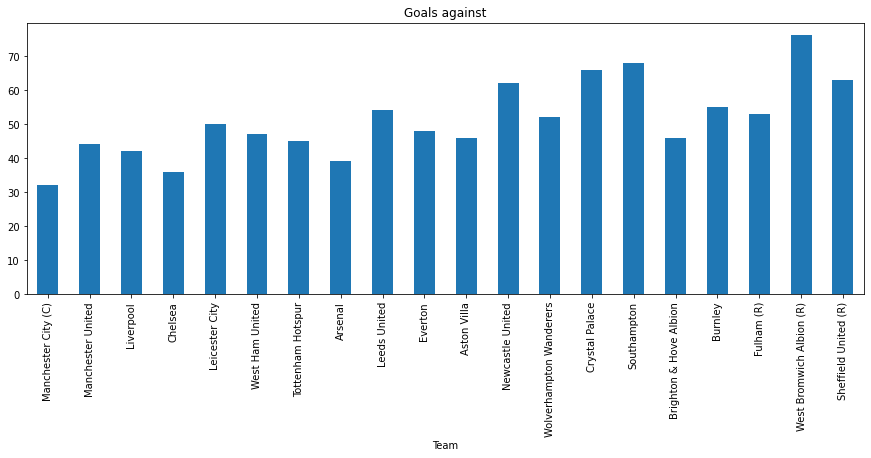

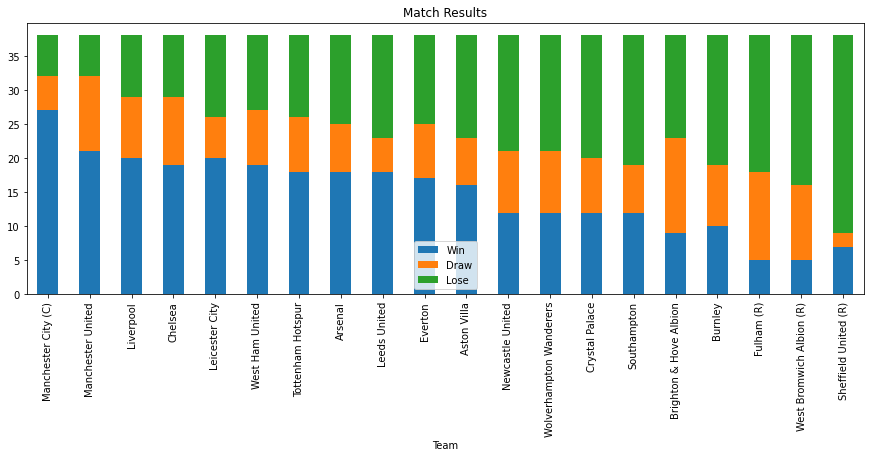

In [17]:
leaguetable.plot.bar(x='Team',
                     y='GF', 
                     title='Goals scored', 
                     legend=False,figsize=(15,5));
leaguetable.plot.bar(x='Team',
                     y='GA', 
                     title='Goals against', 
                     legend=False, 
                     figsize=(15,5));
leaguetable.plot.bar(x='Team',
                     y=['W','D','L'], 
                     stacked=True, 
                     title='Match Results', 
                     legend=False,
                     figsize=(15,5)
                     ).legend(['Win','Draw','Lose'],loc='lower center');



In [18]:
leagueCandidates = leaguetable[leaguetable['Team'].isin(list(candidates['Club']))]
leagueCandidates

,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification or relegation
1,2,Manchester United,38,21,11,6,73,44,+29,74,Qualification for the Champions League group s...
2,3,Liverpool,38,20,9,9,68,42,+26,69,Qualification for the Champions League group s...
7,8,Arsenal,38,18,7,13,55,39,+16,61,NaN


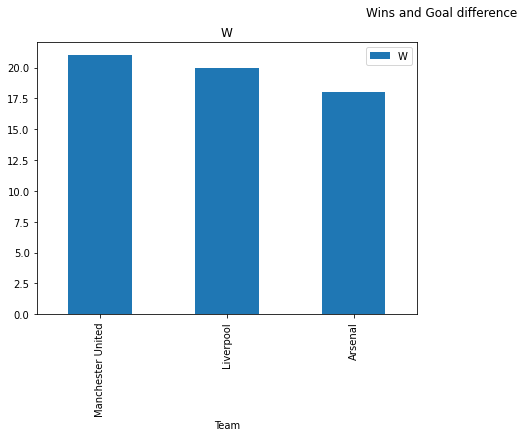

In [19]:
leagueCandidates['GD'].astype('int64', copy=False)
leagueCandidates.plot.bar(x='Team',
                     y=['W','GD'], 
                     title='Wins and Goal difference',
                     subplots=True, 
                     layout=(1,2),
                     figsize=(15,5));
                    


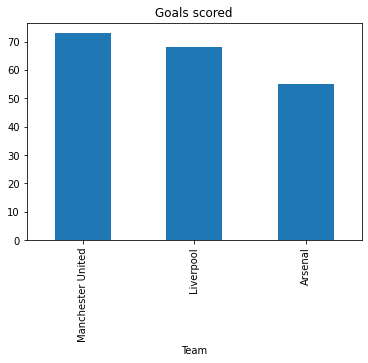

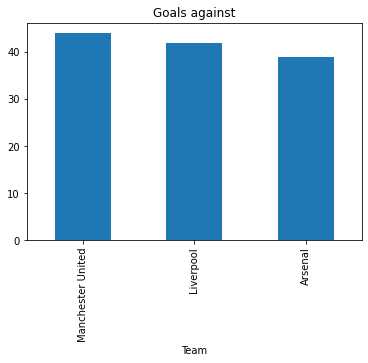

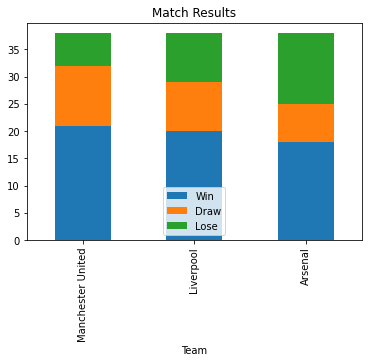

In [22]:
leagueCandidates.plot.bar(x='Team',
                     y='GF', 
                     title='Goals scored', 
                     legend=False);
leagueCandidates.plot.bar(x='Team',
                     y='GA', 
                     title='Goals against', 
                     legend=False);
leagueCandidates.plot.bar(x='Team',
                     y=['W','D','L'], 
                     stacked=True, 
                     title='Match Results', 
                     legend=False,
                     ).legend(['Win','Draw','Lose'],loc='lower center');